# Proyecto Final Aprendizaje Automatico

## Prediccion de puntuacion de un producto en la aplicacion Wish

Autores: Daniel López Acero y Antonio Luis Suarez Solis

### ¿En que consite nuestro proyecto?

El objetivo de nuestro proyecto es tratar de predecir si la nota que tendra un producto puesto en venta en la aplicacion Wish sera buena o mala, por medio de la aplicacion de distintas tecnicas de aprendizaje automatico aprendidas y utilizada durante el curso a una base de datos obtenia de Kaggle.com

Dicha base de datos es esta: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

Antes de ponernos a trabjar, nuestro primer objetivo es realizar un analisis a la base de datos y realizar observaciones.
Esta base de datos cuenta con muchisimos datos de los cuales utilizaremos los mas apropiados y adecuados para desempeñar nuestro objetivo

### Datos:

- Price (Precio del producto)
- retail_price (Precio del producto en otras paginas webs)
- units_sold  (Cantidad de productos vendidos)
- uses_ad_boosts (Si el usuario ha utilizado un boost de publicidad o no)
- rating  (Nota media del producto)
- rating_count (Cantidad de valoraciones del producto)

Vistos los datos que queremos utilizar comenzamos comparandolos, para ello lo que hicimos fue dividir los datos entre los que estan bien valorados y los que no lo estan

### GRAFICAS COMPARATIVOS

<img src="gcomparativaPrice.png">
<img src="gcomparativaretailPrice.png">
<img src="gcomparativaUnidadesVendidas.png">
<img src="gcomparativaboosts.png">

<img src="comparacion.png">

In [23]:
#imports
import pandas as pd
from pandas import DataFrame
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import metrics
from sklearn import preprocessing
from scipy.optimize import minimize as sciMin
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import svm

In [24]:
data = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [25]:
def rating_bynary_trans(rate):
    if rate < 3.7:
        return 0
    else:
        return 1

In [26]:
data.drop(labels = ["title","title_orig","currency_buyer", 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color', 'product_variation_size_id', 'product_variation_inventory', 'shipping_option_name', 'shipping_option_price', 'shipping_is_express', 'shipping_option_price', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating', 'merchant_id', 'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month'], axis = 1, inplace = True)

data["NiceRating"] = data["rating"].map(rating_bynary_trans)
data = data.reset_index(drop=True)

models_times = np.arange(4, dtype = float)


i = 0
def graficaComparativa(campo,titulo,ticklabels):
    global i
    cantidades = data[campo].value_counts()
    lables = cantidades.axes[0].tolist()
    index = np.arange(len(lables))

    badRating = []
    niceRating = []

    for shapes in lables:
        quantity = len(data[data[campo] == shapes].index)
        highRated = len(data[(data[campo] == shapes) & (data['NiceRating'] == 1)].index)
        niceRating.append(highRated)
        badRating.append(quantity-highRated)

    ancho = 0.4
    fig, ax = plt.subplots(figsize=(20,7))
    ax.bar(index, niceRating, ancho, color='#04B486')
    ax.bar(index+ancho, badRating, ancho, color='#C74B08')
    ax.set_xlabel(campo, fontsize = 15)
    ax.set_ylabel('Productos',fontsize=15)  
    ax.set_title(titulo,fontsize=15)
    ax.set_xticks(index+ancho/2)
    ax.set_xticklabels(ticklabels, fontsize=10)
    ax.legend(['High Rated', 'Not High Rated'])
    i = i + 1
    plt.show()

In [27]:
def comparacion():
    NiceRating = []
    BadRating = []

    for cl in data["NiceRating"]:
        if cl==0:
            BadRating.append(cl)
        else:
            NiceRating.append(cl)

    xBars = ['Nice Rating: ' + str(len(NiceRating)), 'Bad Rating:  ' + str(len(BadRating))]        
    ancho = 0.8
    fig, ax = plt.subplots(figsize=(8,7))
    index = np.arange(len(xBars))
    plt.bar(index, [len(NiceRating), len(BadRating)], ancho, color='blue')
    plt.ylabel('Cantidad', fontsize=15)
    plt.xticks(index, xBars, fontsize=12, rotation=30)
    plt.show()



def tranforData(d):
    d["precio_i"] = d["price"].astype(int)
    d["rating_i"] = d["rating"].astype(int)
    d["ratingcount_i"] = d["rating_count"].astype(int)
    d["retail_price_i"] = d["retail_price"].astype(int)
    return d

data = tranforData(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1573 non-null   float64
 1   retail_price    1573 non-null   int64  
 2   units_sold      1573 non-null   int64  
 3   uses_ad_boosts  1573 non-null   int64  
 4   rating          1573 non-null   float64
 5   rating_count    1573 non-null   int64  
 6   NiceRating      1573 non-null   int64  
 7   precio_i        1573 non-null   int32  
 8   rating_i        1573 non-null   int32  
 9   ratingcount_i   1573 non-null   int32  
 10  retail_price_i  1573 non-null   int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 110.7 KB


In [28]:
##graficas


In [29]:

#comparacion()

In [30]:
dataRate = data['NiceRating']
dataRating = DataFrame(dataRate)
dataRating.columns = ['NiceRating']
#eliminamos las....
data.drop(labels = ['precio_i','rating_i','ratingcount_i','retail_price_i','uses_ad_boosts',
                    'rating','rating_count','NiceRating'], axis = 1, inplace = True)


labelEncode = preprocessing.LabelEncoder()

YArr = labelEncode.fit_transform(dataRate.values.ravel())
#print((YArr))

#data.drop(labels = ['NiceRating','rating_i',], axis = 1, inplace = True)

dataFeat = DataFrame(data)

#XArr = pd.get_dummies(dataFeat).values
XArr = pd.get_dummies(dataFeat.astype(str)).values

In [31]:
#Regresion Logistica:
m = len(YArr)

def sigmoide(value):
    s = 1/(1+np.exp(-value))
    return s

#FUNCIÓN DE COSTE
def coste(O, X, Y):
    H = sigmoide(np.dot(X,O))
    logH = np.log(H)
    logHT = logH.T
    logAux = np.log((1- H))
    logAuxT = logAux.T
    YT = Y.T
    suma = (-1/m)* (np.dot(YT, logH) + np.dot((1-YT), logAux))
    return suma
    
#FUNCIÓN DE GRADIENTE
def gradiente(O, X, Y):
    return (X.T.dot((sigmoide(X.dot(O))) - Y))/m

#FUNCIÓN DE COSTE REGULARIZADA (lambda)
def coste2(O, X, Y, lam):
    sol = (coste(O, X, Y) + (lam/(2*m))*(O**2).sum())
    return sol
   
#FUNCIÓN DE GRADIENTE REGULARIZADA (lambda)
def gradiente2(O, X, Y, lam):
    AuxO = np.hstack([np.zeros([1]), O[1:,]])
    return (((X.T.dot(sigmoide(X.dot(O))-Y))/m) + (lam/m)*O)

X = XArr.copy()
X = np.insert(X, 0, 1, axis = 1)

start = time.time()
thetas = np.ones(len(X[0]))
result = opt.fmin_tnc(func = coste2, x0 = thetas, fprime = gradiente2, args = (X, YArr, 0.1))
thetas_opt = result[0]
end = time.time()
print("EXE TIME:", end - start, "seconds")
print("OPT THETAS:\n", thetas_opt)


#Evaluación de los resultados obtenidos en las predicciones con las thetas óptimas
def evalua(thetas, X, y):
    thetasMat = np.matrix(thetas)   
    z = np.dot(thetasMat,X.transpose())
    resultados = sigmoide(z)
    resultados[resultados >= 0.5] = 1
    resultados[resultados < 0.5] = 0
    admitidosPred = sum(np.where(resultados == y)).shape[0]
    return (admitidosPred / len(y)) * 100


prediction = evalua(thetas_opt, X, YArr)
models_times[0] = (prediction)
print(models_times)
print("PREDICTIONS RESULT:",prediction)


EXE TIME: 0.317272424697876 seconds
OPT THETAS:
 [ 1.50910918 -0.4031915  -2.9099099   1.56090587 -2.06249502 -1.19431044
  1.23514191  0.70473714  2.72357627  1.23949392 -3.17784067  1.23949392
  0.65962288 -0.94914339 -2.06249502  2.21733288 -0.595129    2.13537173
 -2.06249502 -1.13436204  0.14290515 -0.18062788  0.6163107   1.60046285
  0.67165209 -0.0585819   1.83767498 -0.49969648 -0.01412898 -0.58471623
 -0.44129831 -1.27979165  2.02006378 -0.29402489  0.89884761  0.03014119
 -2.36346527  1.13034312  1.39517265 -2.63846084 -1.31792001 -2.19397413
  2.07641767  1.55264899 -0.97822924 -0.4702363   0.71170448  1.28681339
 -2.86393571  2.5653525   0.32578624 -0.08765693 -0.15630033 -0.80465275
 -0.06704031  2.60656169 -1.02666081 -4.01660742 -1.09616907  1.46954091
  1.69232588  0.58092128 -2.64514574 -1.47261689  0.74282076 -0.56764744
 -0.81539366 -1.47261689 -0.62603413 -0.72469426 -0.23983273 -2.86374582
 -2.1249053   1.80019544  2.19613645  0.0145612   2.14720917  0.56034606
  

In [32]:
##Red Neuronales
lambda_ = 1
def addColumn(mat):
    return np.hstack([np.ones([np.shape(mat)[0],1]), mat])

def sig_derivated(value):
    return sigmoide(value) * (1- sigmoide(value))

def random_weights(_in, _out):
    weights = np.random.uniform(-0.12,0.12, (_out, 1+_in))
    return weights

def neuralCosteReg(_x, _y, a3, numTags, th1, th2):
    m = np.shape(_x)[0]
    aux1 = -_y*(np.log(a3))
    aux2 = (1-_y) * (np.log(1-a3))
    aux3 = aux1-aux2
    aux4 = np.sum(th1**2) + np.sum(th2**2)
    return (1/m)* np.sum(aux3) + (lambda_/(2*m)) * aux4


In [33]:
def forward_prop(_x, th1, th2):
    m = np.shape(_x)[0]
    a1 = np.hstack([np.ones([m,1]), _x])
    z2 = np.dot(a1, th1.T)
    a2 = np.hstack([np.ones([m,1]), sigmoide(z2)])
    z3 = np.dot(a2, th2.T)
    h = sigmoide(z3)
    return h, a1, z2, a2,z3

def prop(a1, th1, th2):
    a1 = addColumn(a1)
    a2 = sigmoide(np.dot(a1, np.transpose(th1)))
    a2 = addColumn(a2)
    a3 = sigmoide(np.dot(a2, np.transpose(th2)))
    return a1,a2,a3

In [34]:
def back_prop(params_rn, num_entradas, num_ocultas, numTags, _x, _y, _reg):
    thet1 = np.reshape(params_rn[:num_ocultas*(num_entradas + 1)],(num_ocultas, (num_entradas + 1)))
    thet2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1):],(numTags, (num_ocultas + 1)))
    # Paso 1: Hacerse con las llaves
    a1, a2, a3 = prop(_x, thet1, thet2)
    m = np.shape(_x)[0]
    delta3 = a3 - _y
    # Paso 2: Ascender desde la oscuridad
    delta_mat1 = np.zeros(np.shape(thet1))
    delta_mat2 = np.zeros(np.shape(thet2))
    aux1 = np.dot(delta3, thet2)
    aux2 = addColumn(sig_derivated(np.dot(a1, np.transpose(thet1))))
    delta2 = aux1*aux2
    delta2 = np.delete(delta2, [0], axis = 1)
    # Paso 3: Lluvia de fuego
    delta_mat1 = delta_mat1+ np.transpose(np.dot(np.transpose(a1), delta2))
    delta_mat2 = delta_mat2 + np.transpose(np.dot(np.transpose(a2), delta3))
    # Paso 4: Ensartar a la bestia alada   LOS NUMEROS MASON, LOS NUMEROOOOOS
    delta_mat1  = (1/m)*delta_mat1
    delta_mat1[:, 1:] = delta_mat1[:, 1:] + (_reg/m)*thet1[:, 1:]

    delta_mat2  = (1/m)*delta_mat2
    delta_mat2[:, 1:] = delta_mat2[:, 1:] + (_reg/m)*thet2[:, 1:]
    #Paso 5: Con puño de hierro
    coste = neuralCosteReg(_x, _y,a3,  numTags, thet1,thet2)
    gradient = np.concatenate((np.ravel(delta_mat1), np.ravel(delta_mat2)))
    return coste, gradient


In [35]:
def evaluateLearning(_y, _out):
    checker = (_out >0.7)
    count = np.size(np.where(checker[:, 0] == _y[:, 0]))
    fin = count/np.shape(_y)[0]*100
    return fin, checker
def NeuralNet(_data):
    _X = XArr.copy()
    _y = YArr.copy()

    _y = np.reshape(_y, (np.shape(_y)[0], 1))

    num_entradas = np.shape(_X)[1]
    num_ocultas = 25
    numTags = 1

    the1 = random_weights(num_entradas, num_ocultas)
    the2 = random_weights(num_ocultas, numTags)

    theta_vector = np.concatenate((np.ravel(the1), np.ravel(the2)))
    start = time.time()
    thetas = sciMin(fun = back_prop, x0 =theta_vector, args = (num_entradas, num_ocultas, numTags, _X, _y, lambda_),
    method = 'TNC', jac = True, options = {'maxiter': 70}).x
    end = time.time()

    the1 = np.reshape(thetas[:num_ocultas*(num_entradas+1)], (num_ocultas, (num_entradas+1)))
    the2 = np.reshape(thetas[num_ocultas* (num_entradas+1):], (numTags, (num_ocultas+1)))

    a,c = evaluateLearning(_y, forward_prop(_X, the1, the2)[0])

    print("----------------------------------------------\n")
    print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
    
    print("PREDICTION NEURAL_NETWORK: " + str(a) + " %")
    models_times[1] = a
    print("----------------------------------------------\n")
NeuralNet(data)

----------------------------------------------


 TRAINING EXECUTION TIME: 0.22169017791748047 seconds
PREDICTION NEURAL_NETWORK: 62.49205340114431 %
----------------------------------------------



In [36]:
#svm 

In [37]:
#lineal
XSvm = XArr.copy()
YSvm = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvm, YSvm, test_size=0.33, random_state=42)

#SVM de tipo lineal
Coef = 1.0
svmLineal = svm.SVC(kernel='linear',C=Coef)

#Entrenamiento de las "redes". Similar a buscar las thetas óptimas
start = time.time()
svmFitted = svmLineal.fit(X_Train, Y_Train)
end = time.time()
print("\nTRAINING EXECUTION TIME:", end - start, "seconds")
#predecimos Y a partir de la x "entrenada"
predictY = svmLineal.predict(X_test)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1
    return (numAciertos/(len(Y_test)))*100

success = evalua(predictY, Y_test)
models_times[2] = success
print("\nPREDICTIONS SVM LINEAL",success)


TRAINING EXECUTION TIME: 0.16313982009887695 seconds

PREDICTIONS SVM LINEAL 59.80769230769231


In [38]:
#gausiano
XSvmG = XArr.copy()
YSvmG = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvmG, YSvmG, test_size=0.33, random_state=42)

Coef=1
sigma = 0.1
svmGauss = svm.SVC(C = Coef, kernel = 'rbf', gamma = 1/(2*sigma **2))

start = time.time()
svmGaussFitted = svmGauss.fit(X_Train, Y_Train)
end = time.time()
print("\nTRAINING EXECUTION TIME:", end - start, "seconds")
predictY = svmGauss.predict(X_test)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1
    return (numAciertos/(len(Y_test)))*100

success = evalua(predictY, Y_test)
models_times[3] = success
print("\nPREDICTIONS SVM GAUSS",success)


TRAINING EXECUTION TIME: 0.18015456199645996 seconds

PREDICTIONS SVM GAUSS 66.53846153846153


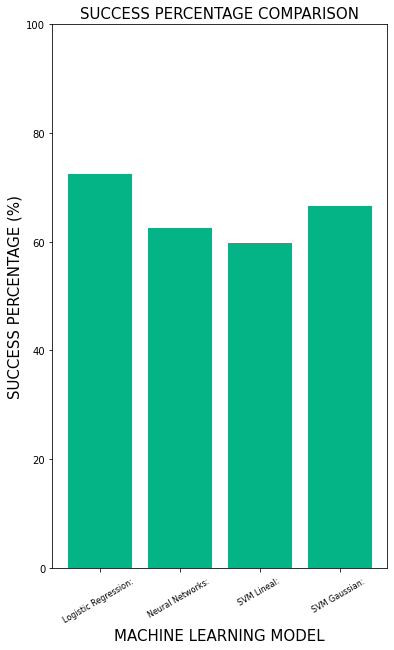

In [39]:
#comparacion final
xBars = ['Logistic Regression: ', 
         'Neural Networks: ' , 
         'SVM Lineal: ' , 
         'SVM Gaussian: ']        
ancho = 0.8
fig, ax = plt.subplots(figsize=(6,10))
index = np.arange(len(xBars))
plt.bar(index, [models_times[0], models_times[1], models_times[2], models_times[3]], ancho, color='#04B486')
plt.xlabel('MACHINE LEARNING MODEL', fontsize=15)
plt.ylabel('SUCCESS PERCENTAGE (%)', fontsize=15)
plt.xticks(index, xBars, fontsize=8, rotation=30)
plt.title('SUCCESS PERCENTAGE COMPARISON', fontsize=15)
plt.ylim((0, 100))
plt.show()